# Lab Segmentation 2

In [515]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


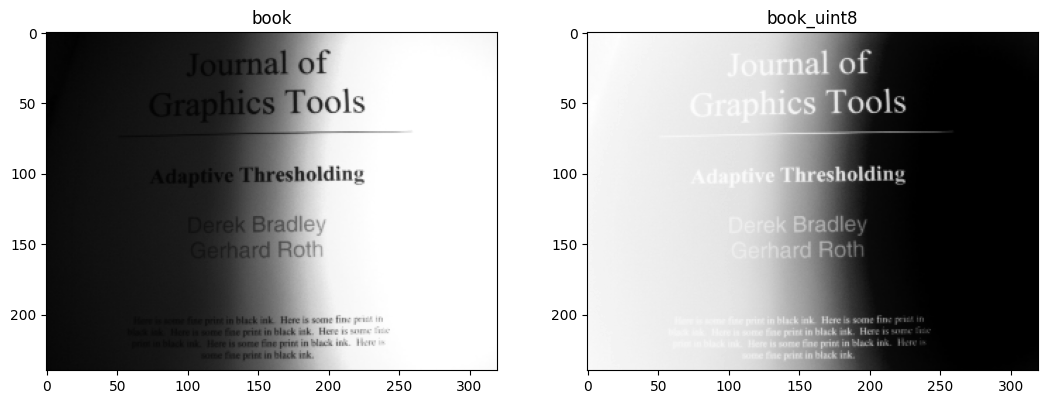

In [516]:
book_img = io.imread("book.png")
book_img.shape
book_img_uint = (book_img*255).astype(np.uint8)
show_images([book_img, book_img_uint], ["book", "book_uint8"])

## Experiment 1: histogram auto thresholding technique

In [517]:
def get_threshold (matrix):
    number_of_pixels=0
    summation=0
    for i in range (len(matrix[0])):
        number_of_pixels+=matrix[0][i]
        summation+=matrix[0][i]*matrix[1][i]
        
    # Handle division by zero
    if number_of_pixels == 0:
        return 0  # Default to 0 or choose another fallback value
        
    return round(summation/number_of_pixels) 


def repetitive_threshold(histogram, initial_threshold):
    while True:
        lower_pixels = histogram[1] < initial_threshold
        higher_pixels = histogram[1] > initial_threshold
        
        lower_mean = get_threshold([histogram[0][lower_pixels], histogram[1][lower_pixels]])
        higher_mean = get_threshold([histogram[0][higher_pixels], histogram[1][higher_pixels]])
        
        new_threshold = round((lower_mean + higher_mean) / 2)
        
        if initial_threshold == new_threshold:
            break
        
        initial_threshold = new_threshold
    
    return initial_threshold




In [518]:
def get_binary_segmented_image(img):
    # convert to greyscale if it is a colored image
    
    if len(img.shape) == 3:
        img = rgb2gray(img)
        
    img_uint8 = (img * 255).astype(np.uint8)
    
    
    img_hist = histogram(img_uint8)
    
    threshold = repetitive_threshold(img_hist, get_threshold(img_hist))
    # print(threshold)
    # threshold = repetitive_threshold(img)
    binary_img = img_uint8 > threshold
    return binary_img


def segment_and_show(img):
    binary_img = get_binary_segmented_image(img)
    show_images([img, binary_img], ["original", "binary"])

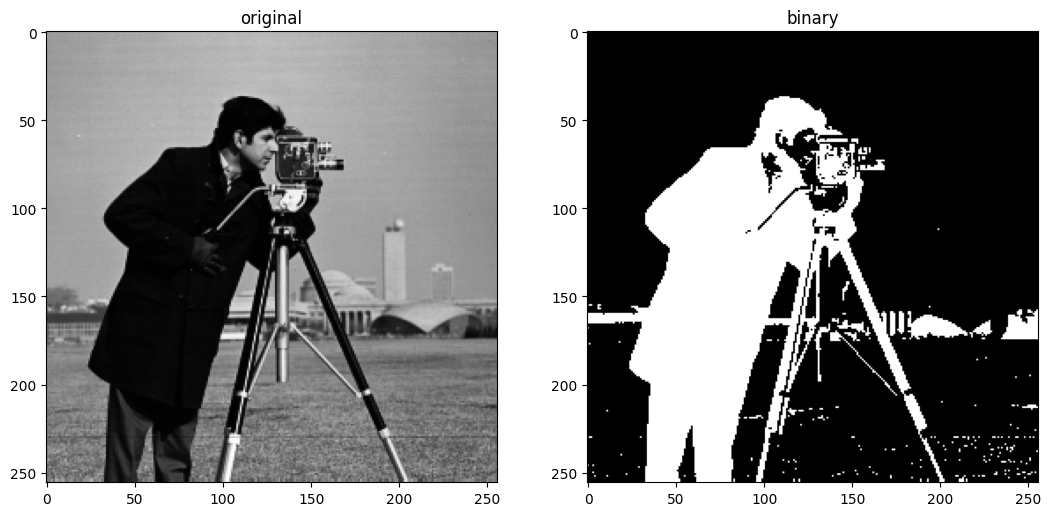

In [519]:
cameraman_img = io.imread("cameraman.png")
segment_and_show(cameraman_img)

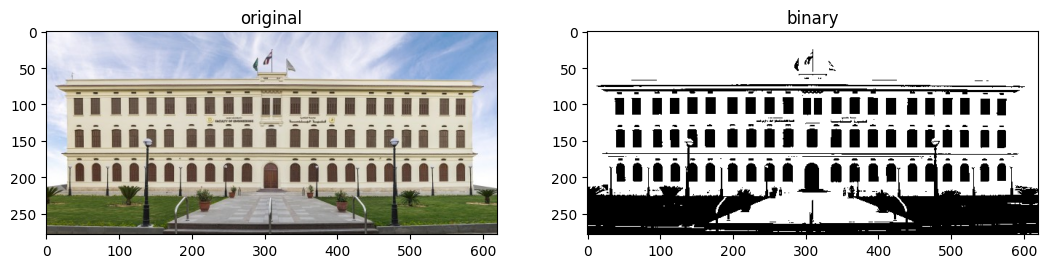

In [520]:

cufe_img = io.imread("cufe.png")
segment_and_show(cufe_img)

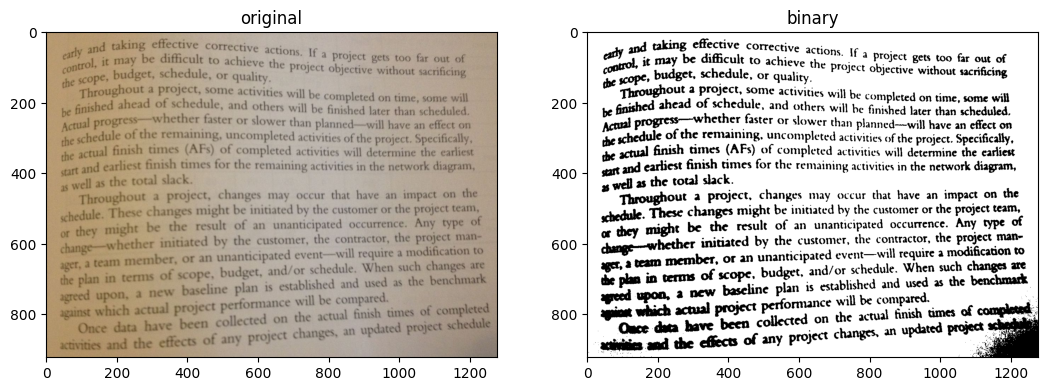

In [521]:
book1_img = io.imread("book1.png")
segment_and_show(book1_img)


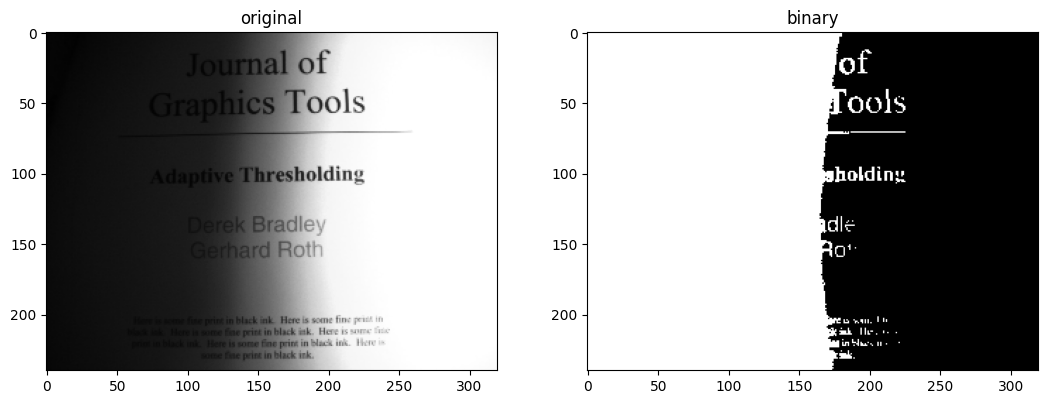

In [522]:
book_img = io.imread("book.png")
segment_and_show(book_img)

> ### We see that the results are terrible becuase we are using one global threshold for the whole image

## Experiment 2: adaptive thresholding

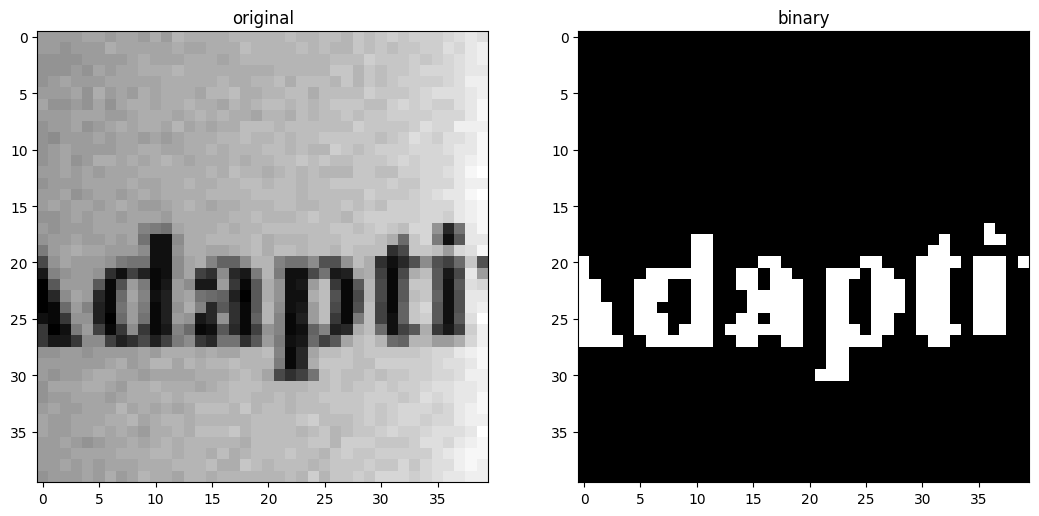

In [529]:
# quick test
segment_and_show(book_img[80:120, 80:120])

In [530]:
# split each photo into 4 squares
# and segment each square

def split_segment_show(img):
    
    h, w = img.shape[0], img.shape[1]
    h = h // 2
    w = w // 2
    
    img1 = get_binary_segmented_image(img[:h, :w])
    img2 = get_binary_segmented_image(img[:h, w:])
    img3 = get_binary_segmented_image(img[h:, :w])
    img4 = get_binary_segmented_image(img[h:, w:])
    
    # concatenate the 4 images back into one
    segmented_img = np.concatenate((np.concatenate((img1, img2), axis=1), np.concatenate((img3, img4), axis=1)), axis=0)
    
    show_images([img, segmented_img], ["original", "segmented"])

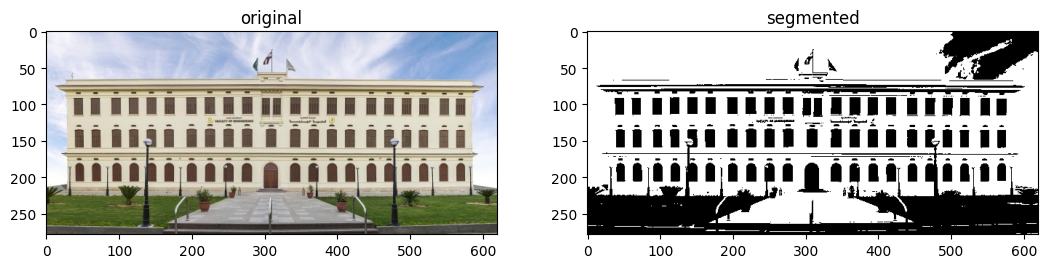

In [531]:
split_segment_show(cufe_img)

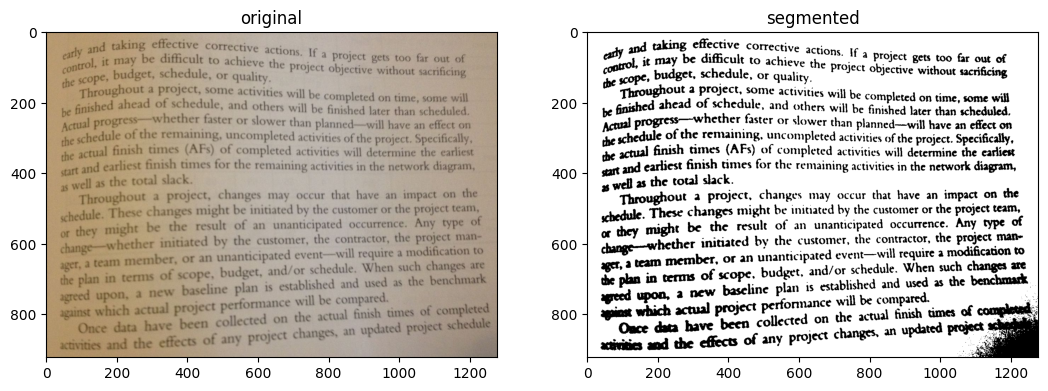

In [532]:
split_segment_show(book1_img)

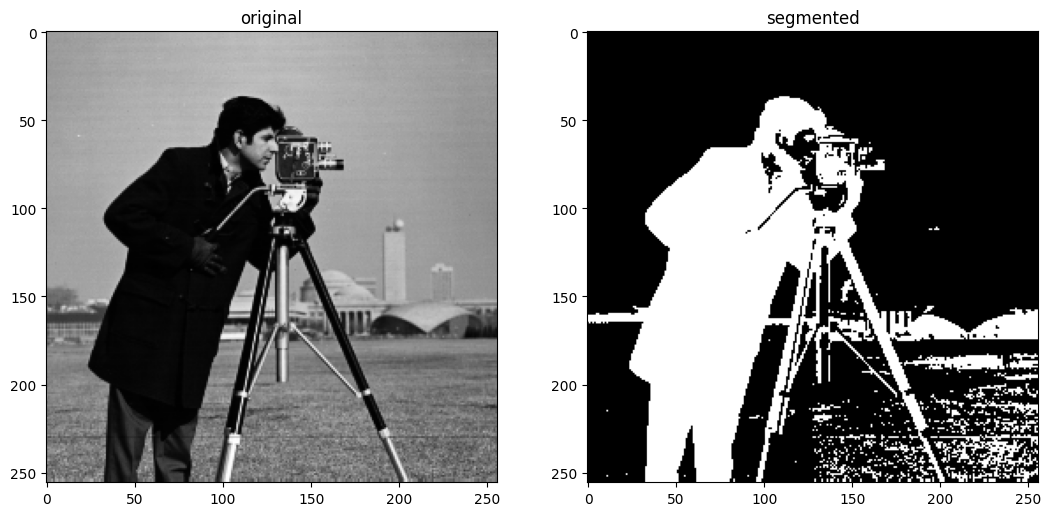

In [533]:
split_segment_show(cameraman_img)

In [534]:
# for the book image, the segmentation is not very clear
# so we need to split the image vertivally
# and segment each part


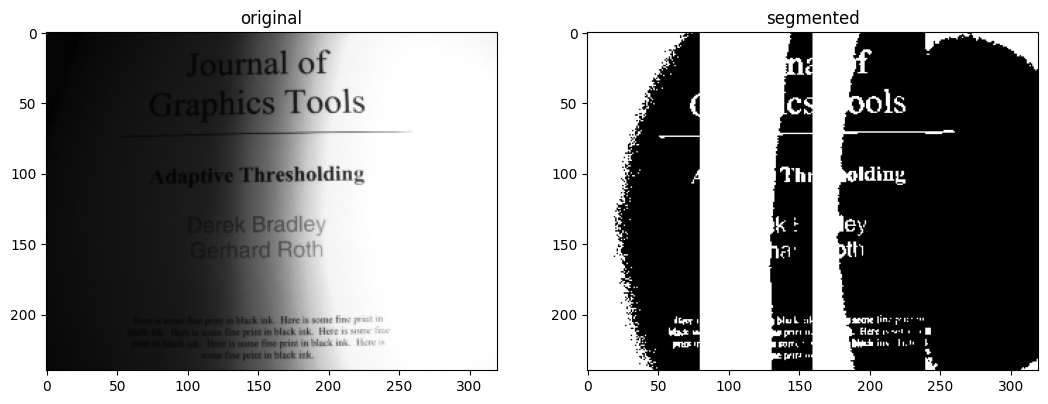

In [535]:
book_img = io.imread("book.png")

h, w = book_img.shape[0], book_img.shape[1]

a = w //4
b = w // 2
c = 3 * w // 4

img1 = get_binary_segmented_image(book_img[:, :a])
img2 = get_binary_segmented_image(book_img[:, a:b])
img3 = get_binary_segmented_image(book_img[:, b:c])
img4 = get_binary_segmented_image(book_img[:, c:])
# concatenate the 4 images back into one
segmented_img = np.concatenate((np.concatenate((img1, img2), axis=1), np.concatenate((img3, img4), axis=1)), axis=1)
show_images([book_img, segmented_img], ["original", "segmented"])

## Experiment 3: bonus

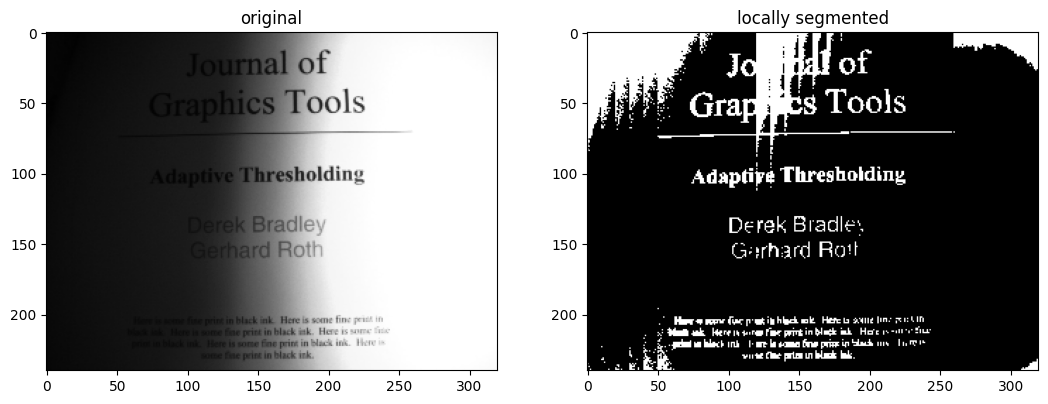

In [549]:
def segment_image_vertically(img, num_segments=4):
    h, w = img.shape[0], img.shape[1]
    segment_width = w // num_segments
    segmented_parts = []

    for i in range(num_segments):
        start = i * segment_width
        end = (i + 1) * segment_width if i < num_segments - 1 else w
        segmented_part = get_binary_segmented_image(img[:, start:end])
        segmented_parts.append(segmented_part)

    segmented_img = np.concatenate(segmented_parts, axis=1)
    return segmented_img

segmented_img = segment_image_vertically(book_img, 32)
show_images([book_img, segmented_img], ["original", "locally segmented"])